# <font color='green'> _Assignment 4_</font>
***
### <font color='green'>*Main Task*</font>
> <font color='red'>To compute and plot the Low Level Wind Shear (LLWS) by computing windspeed from a wrfout  NetCDF file
(Alaska or Florida),  using V and F fields . 

### <font color='green'>*Sub Tasks*</font>
<font color='red'> 
> 1. 3D U and V fields are on “staggered” grids. Use the function destagger_uv(ustagger, vstagger)
> 2. Covert XLAT & XLON to map coordinates
> 3. 	Plot LLWS(knots) using Basemap(with Alaska or Florida Map)
> 4. 	Plot a warning area where LLWS exceeds 10 knots * </font>


### <font color='green'> *Define* </font>  `WRFOUT_FILE_PATH` 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.basemap as bm
import netCDF4
import matplotlib.colors

#WRFOUT_FILE_PATH = 'wrfout_d01_2017-09-11_06:00:00' # Florida
WRFOUT_FILE_PATH ='wrfout_d01_2018-08-13_00:00:00' #Alaska

### <font color='green'> *Extract* `U V XLAT XLONG`  *destaggerd* `U & V `</font>

In [5]:
dataset = netCDF4.Dataset(WRFOUT_FILE_PATH, 'r')

# Get the 2D arrays of lats and lons, corresponding to 
# each data grid point
# Recall that dimensions ar (Time, south_north, west_east)

XLAT = dataset.variables['XLAT'][:]
XLON = dataset.variables['XLONG'][:]

#Get the lower left and upper right corner lat and lon
ll_lat = XLAT[0, 0, 0]; ll_lon = XLON[0, 0, 0]
ur_lat = XLAT[0, -1, -1]; ur_lon = XLON[0, -1, -1]



def destagger_uv(ustagger=None, vstagger=None):
   
    """
    Creates arrays u and v on grid points rather than their native mass points
    by assigning to each grid point the average of the adjacent mass points

    Assumes ustagger has dimensions (Time, bottom_top, south_north, west_east_stag)
    Assumes vstagger has dimensions (Time, bottom_top, south_north_stag, west_east)

    By averaging, creates U and V arrays of dimensions 
    (Time, bottom_top, south_north, west_east)
    """

    # We can compute the dimensions of the arrays through knowledge of 
    # their shapes
    Time_dim = ustagger.shape[0]
    bottom_top_dim = ustagger.shape[1]
    south_north_dim = ustagger.shape[2]
    west_east_stag_dim = ustagger.shape[3]
    south_north_stag_dim = vstagger.shape[2]
    west_east_dim = vstagger.shape[3]

    # Allocate and shape the arrays that will be returned
    u = v = np.ndarray( (Time_dim, bottom_top_dim, south_north_dim, west_east_dim) )

    # Now the destaggering - each grid point in the destaggered array is
    # the average of the adjacent mass points in the staggered arrays

    for j in np.arange(west_east_dim):
        u[:,:,:,j] = ( ustagger[:,:,:,j] + ustagger[:,:,:,j+1] ) / 2.0
    for i in np.arange(south_north_dim):
        v[:,:,i,:] = ( vstagger[:,:,i,:] + vstagger[:,:,i+1,:] ) / 2.0    

    return u, v


U_staggered = dataset.variables['U'][:]
V_staggered = dataset.variables['V'][:]
U, V = destagger_uv(U_staggered, V_staggered)

#Create WS10
WS = (np.sqrt(U**2 + V**2)) *1.94384 #convert the units to knots
dataset.close()

### <font color='green'> *Compute `LLWS` 2D field and plot it* </font>

/usr/lib/python3/dist-packages/mpl_toolkits/basemap/__init__.py:3644: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xx = x[x.shape[0]/2,:]


<function matplotlib.pyplot.show(*args, **kw)>

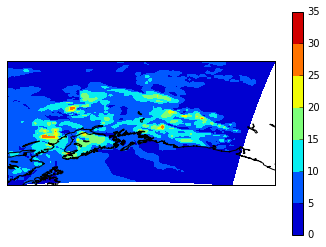

In [6]:
# This is all we need to define a cylindrical map project
the_map = bm.Basemap(projection='cyl',
                    llcrnrlon=ll_lon,
                    llcrnrlat=ll_lat,
                    urcrnrlon=ur_lon,
                    urcrnrlat=ur_lat,
                    resolution= 'i',
                    area_thresh=100.0)
the_map.drawcoastlines()
LLWS = abs(WS[0,1,:,:] - WS[0,0,:,:])

#2d map coordinates
map2d_x, map2d_y = the_map(XLON[0,:,:], XLAT[0,:,:])

the_map.contourf(map2d_x, map2d_y, LLWS[:,:])

plt.colorbar()
plt.show


### <font color='green'> *Compute "warning areas" where `LLWS > 10` & Plot*</font>

<function matplotlib.pyplot.show(*args, **kw)>

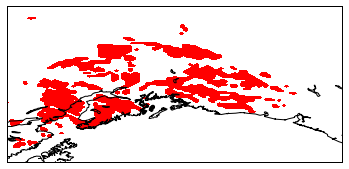

In [8]:
THRESHOLD = 10.0
masked_array = (LLWS > THRESHOLD)

# This is all we need to define a cylindrical map project
the_map = bm.Basemap(projection='cyl',
                    llcrnrlon=ll_lon,
                    llcrnrlat=ll_lat,
                    urcrnrlon=ur_lon,
                    urcrnrlat=ur_lat,
                    resolution= 'i',
                    area_thresh=100.0)
the_map.drawcoastlines()


cmap = matplotlib.colors.ListedColormap(['w','r'])
plt.contourf(map2d_x, map2d_y, masked_array, cmap=cmap)
plt.show

## <font color='green'>*Conclusion*</font>
> <font color='red'>I found this assignment very easy and it was fun too.<br> I followed the guidenlines and computed all variables according to the instructions.<br> I believe my results are valid because the graph is similar to the one shown in lecture.<br> Also, the computed values looks normal.<br> The formatting of the notebook was a great learning experience. </font>